In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the data and displaying basic information
listeningData = pd.read_csv('Data/mxmh_survey_results.csv')

display(listeningData.head())
display(listeningData.describe())
# displays how many null values we have for each category
display(listeningData.isna().sum())

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

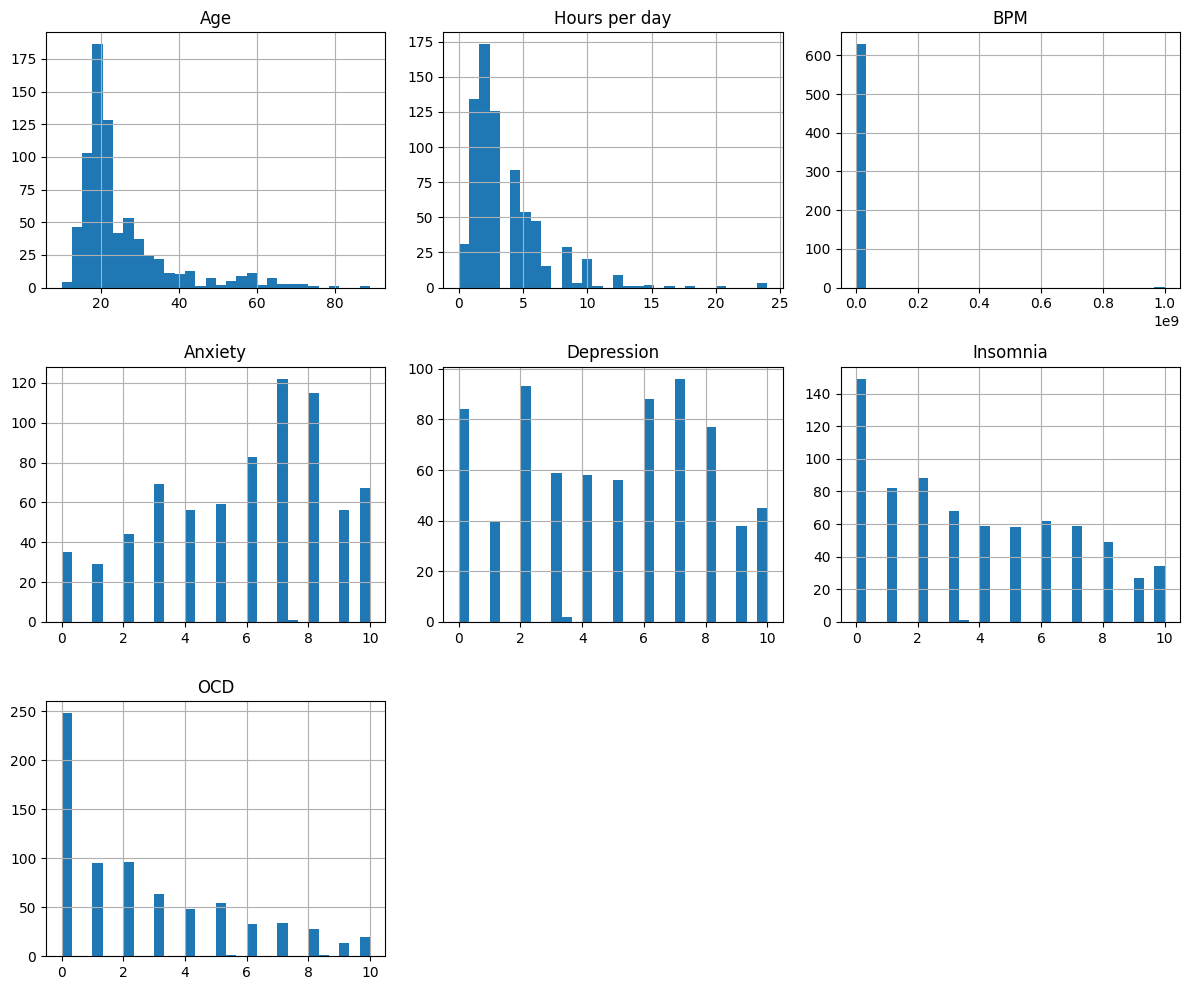

In [3]:
# Plotting the data points in a column
listeningData.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

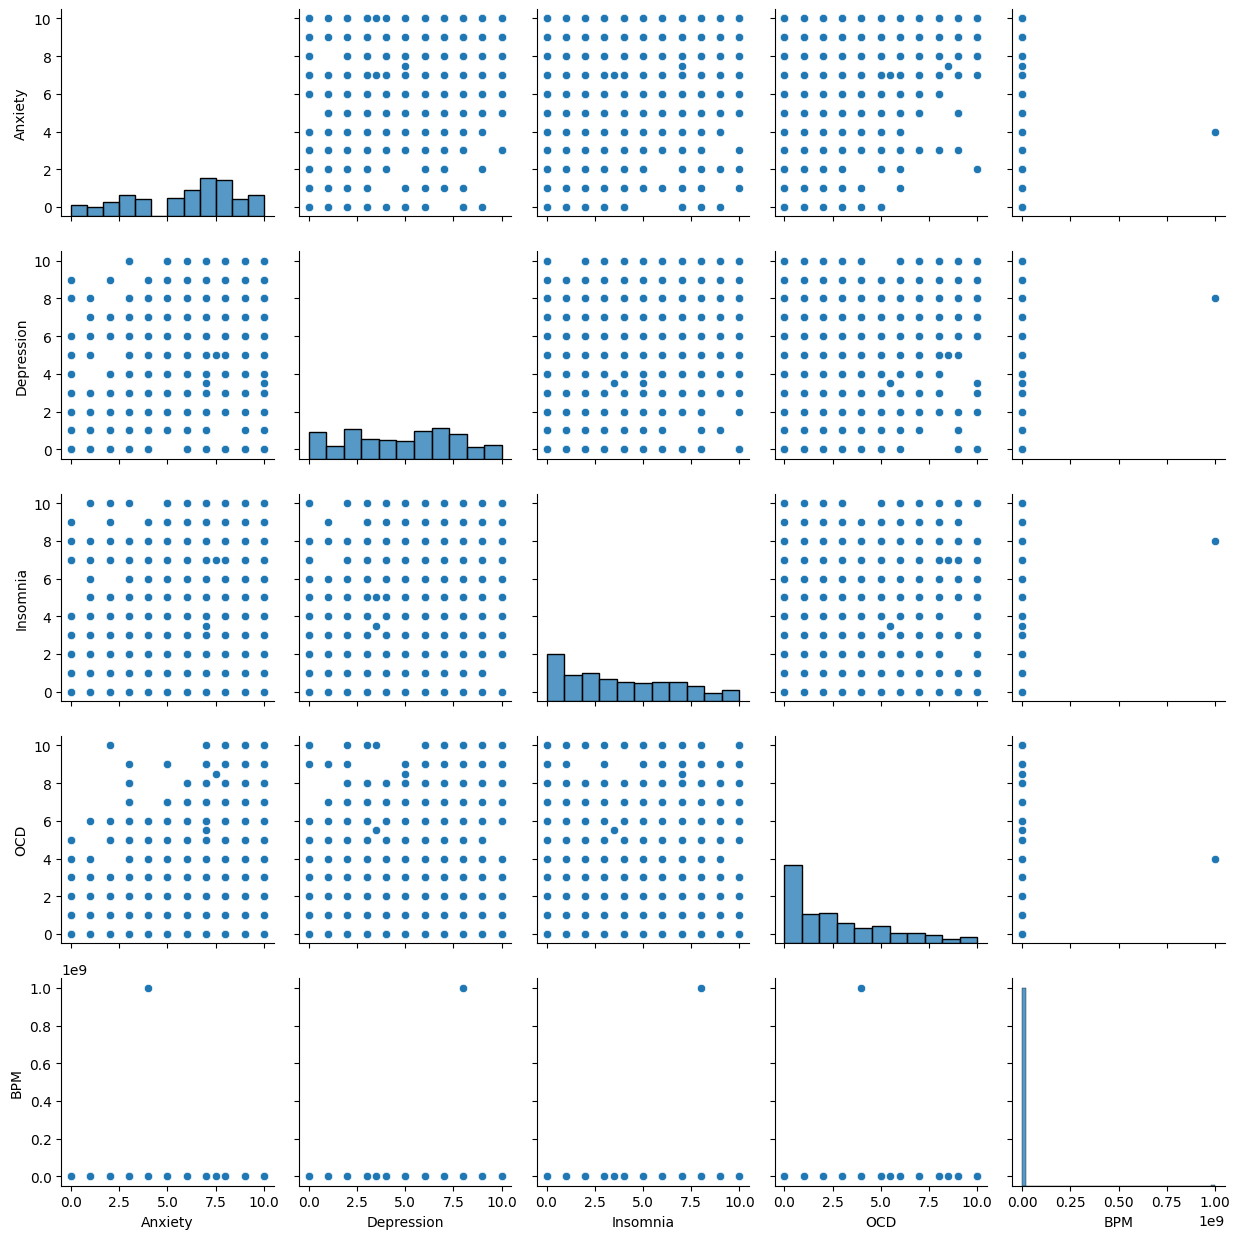

In [4]:
# EDA before encoding
# Exploratory Data Analysis
cols = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
cols1 = ['Anxiety', 'Depression', 'Insomnia', 'OCD', 'BPM']
sns.pairplot(listeningData[cols1])
plt.tight_layout()
plt.show()

In [34]:
# Dropping irrelevant columns and examples with missing data
listeningData_dropped = listeningData.drop(['Timestamp', 'Primary streaming service', 'Permissions', 'Music effects', 'Fav genre'], axis=1)
listeningData_dropped = listeningData_dropped.dropna()
# Dropping outliers found
listeningData_dropped = listeningData_dropped[listeningData_dropped['BPM'] != 999999999]
display(listeningData_dropped.head())
display(listeningData_dropped.isna().sum())
print(listeningData_dropped)

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,18.0,3.0,Yes,Yes,Yes,Yes,Yes,156.0,Rarely,Never,...,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,63.0,1.5,Yes,No,No,Yes,No,119.0,Sometimes,Never,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,18.0,4.0,No,No,No,No,Yes,132.0,Never,Never,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,61.0,2.5,Yes,No,Yes,Yes,Yes,84.0,Sometimes,Never,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,18.0,4.0,Yes,No,No,Yes,No,107.0,Never,Never,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0


Age                             0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
dtype: int64

      Age  Hours per day While working Instrumentalist Composer Exploratory  \
0    18.0            3.0           Yes             Yes      Yes         Yes   
1    63.0            1.5           Yes              No       No         Yes   
2    18.0            4.0            No              No       No          No   
3    61.0            2.5           Yes              No      Yes         Yes   
4    18.0            4.0           Yes              No       No         Yes   
..    ...            ...           ...             ...      ...         ...   
731  17.0            2.0           Yes             Yes       No         Yes   
732  18.0            1.0           Yes             Yes       No         Yes   
733  19.0            6.0           Yes              No      Yes         Yes   
734  19.0            5.0           Yes             Yes       No          No   
735  29.0            2.0           Yes              No       No         Yes   

    Foreign languages    BPM Frequency [Classical] 

In [41]:
# Encoding the categorical features
df = listeningData_dropped

# saving the target columns to add back later
removed_cols = df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].copy()
df = df.drop(columns=['Anxiety', 'Depression', 'Insomnia', 'OCD'])

# Detect numeric
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
print(numeric_cols)
# Detect yes/no (binary)
binary_cols = [
    col for col in df.select_dtypes(include=["object"]).columns
    if set(df[col].dropna().unique()) <= {"Yes", "No"}
    # 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages'
]
# print(df.select_dtypes(include=["object"]).columns[0])
print(binary_cols)
# Detect frequency ordinal columns
frequency_order = ["Never", "Rarely", "Sometimes", "Very frequently"]
ordinal_cols = [
    col for col in df.select_dtypes(include=["object"]).columns
    if set(df[col].dropna().unique()).issubset(frequency_order)
    # 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
    # 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
    # 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
    # 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]'
]
print(ordinal_cols)

# make transformer so we can encode and normalize
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("bin", OrdinalEncoder(categories=[["No", "Yes"]]*len(binary_cols)), binary_cols),
        ("ord", OrdinalEncoder(categories=[frequency_order]*len(ordinal_cols)), ordinal_cols)
    ]
)

listeningData_encoded = preprocessor.fit_transform(df)

# collecting all the columns names again to add back in
output_cols = []
output_cols += numeric_cols
output_cols += binary_cols
output_cols += ordinal_cols

# turn numpy array back into dataframe
listeningData_encoded = pd.DataFrame(listeningData_encoded, columns=output_cols)
# adding the target columns back in
listeningData_encoded = listeningData_encoded.reset_index(drop=True)
removed_cols = removed_cols.reset_index(drop=True)
listeningData_encoded = pd.concat([listeningData_encoded, removed_cols], axis=1)
display(listeningData_encoded.head())
print(listeningData_encoded.columns)



['Age', 'Hours per day', 'BPM']
['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']


,Age,Hours per day,BPM,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,-0.58288,-0.224680,0.823669,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,3.0,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0
1,3.26058,-0.715164,-0.114488,1.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,2.0,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0
2,-0.58288,0.102309,0.215135,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0
3,3.08976,-0.388175,-1.001935,1.0,0.0,1.0,1.0,1.0,2.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0
4,-0.58288,0.102309,-0.418755,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0


Index(['Age', 'Hours per day', 'BPM', 'While working', 'Instrumentalist',
       'Composer', 'Exploratory', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD'],
      dtype='object')


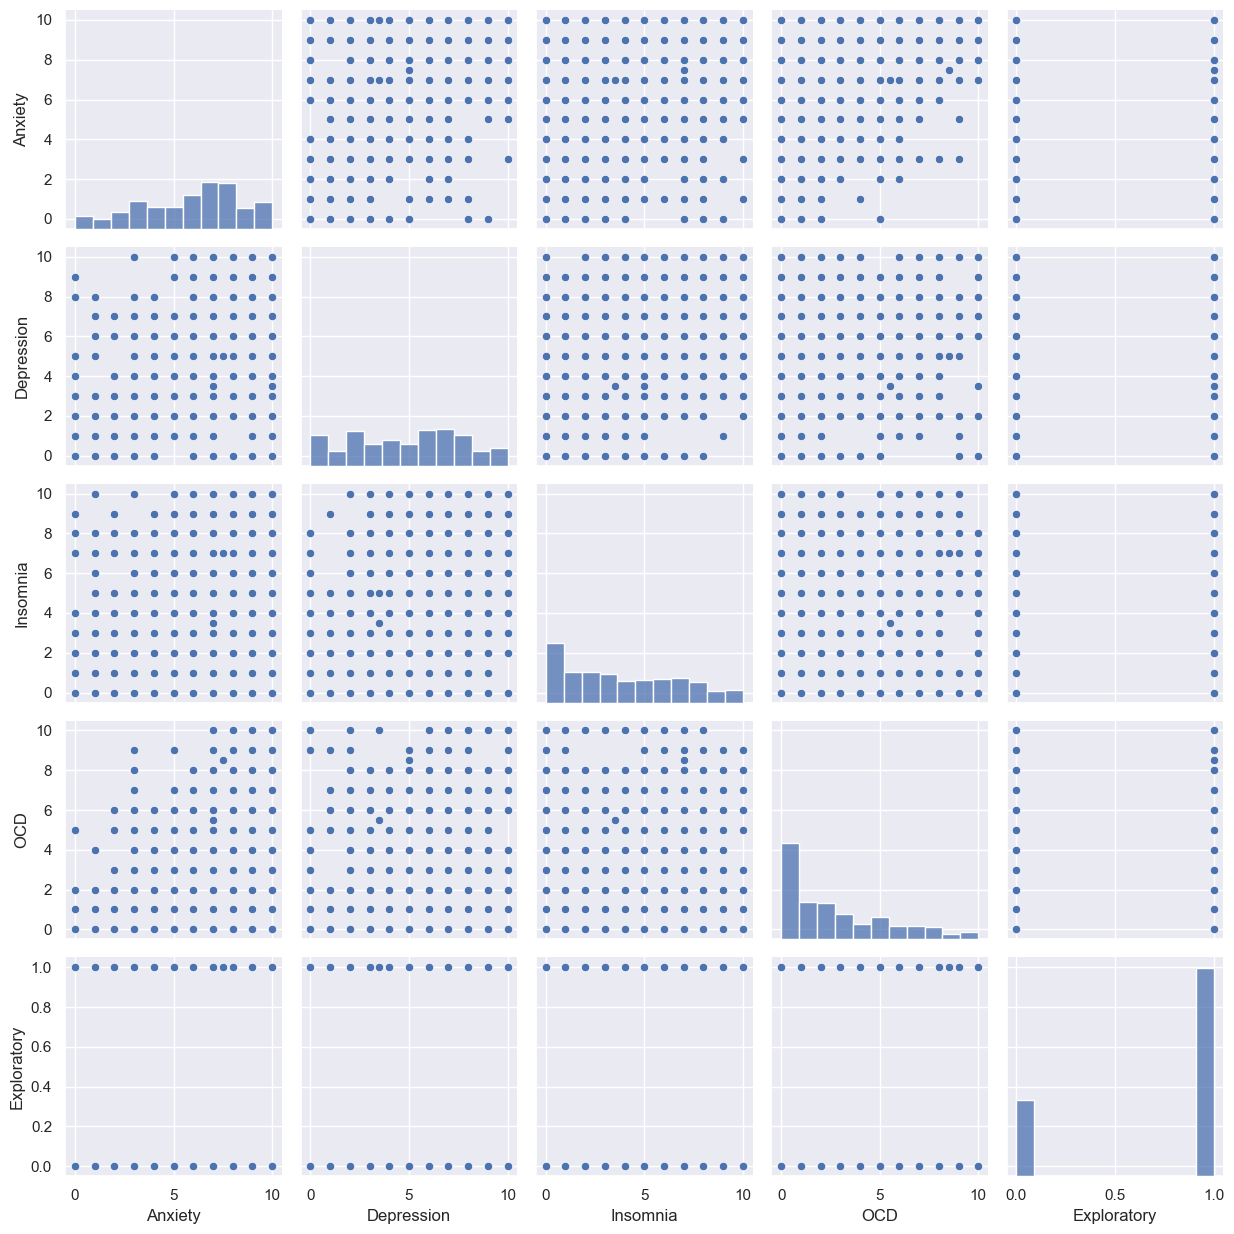

In [30]:
# Exploratory Data Analysis
cols = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
cols1 = ['Anxiety', 'Depression', 'Insomnia', 'OCD', 'Exploratory']
sns.pairplot(listeningData_encoded[cols1])
plt.tight_layout()
plt.show()

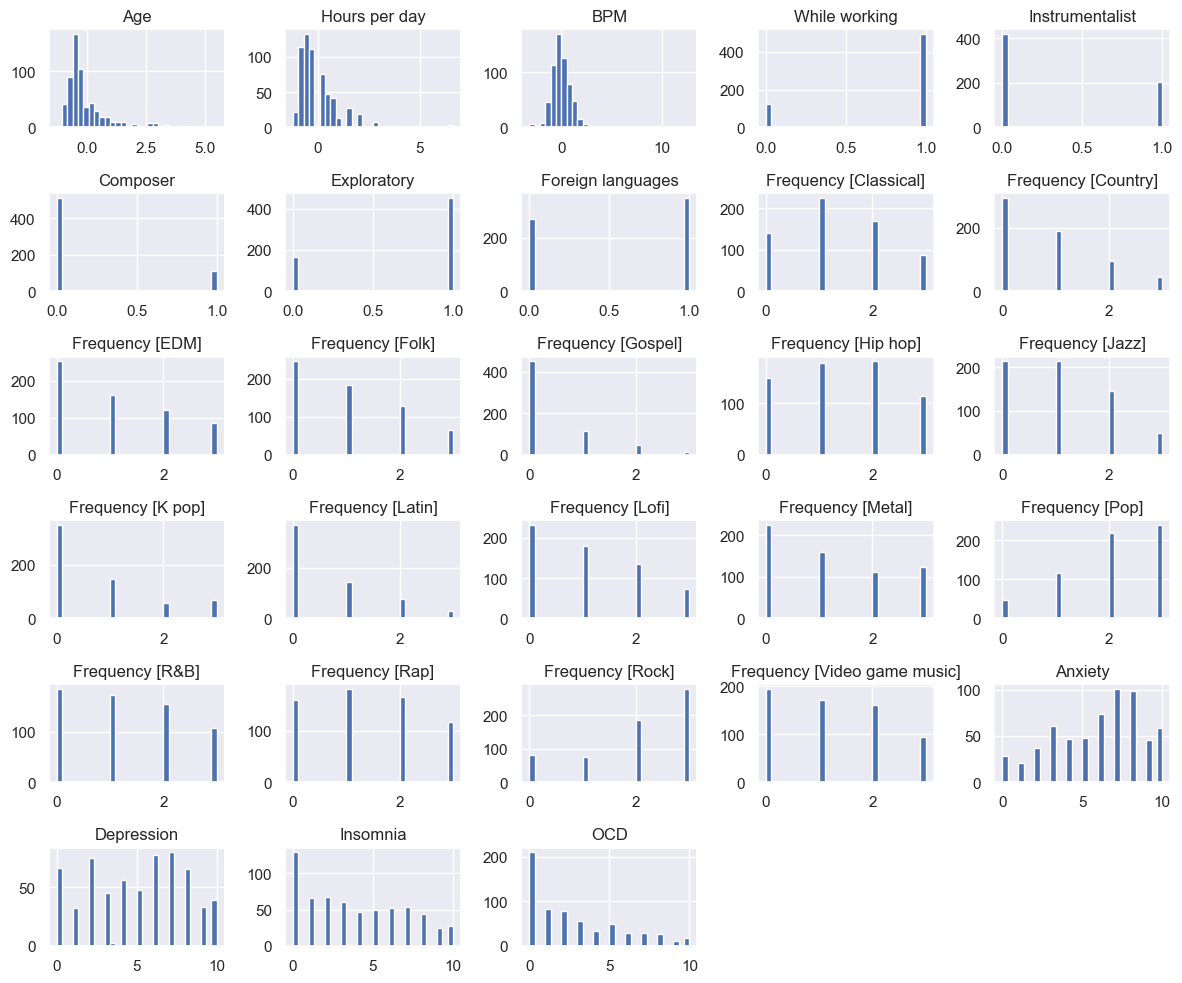

In [47]:
# Plotting the data points in a column after dropping and encoding
listeningData_encoded.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

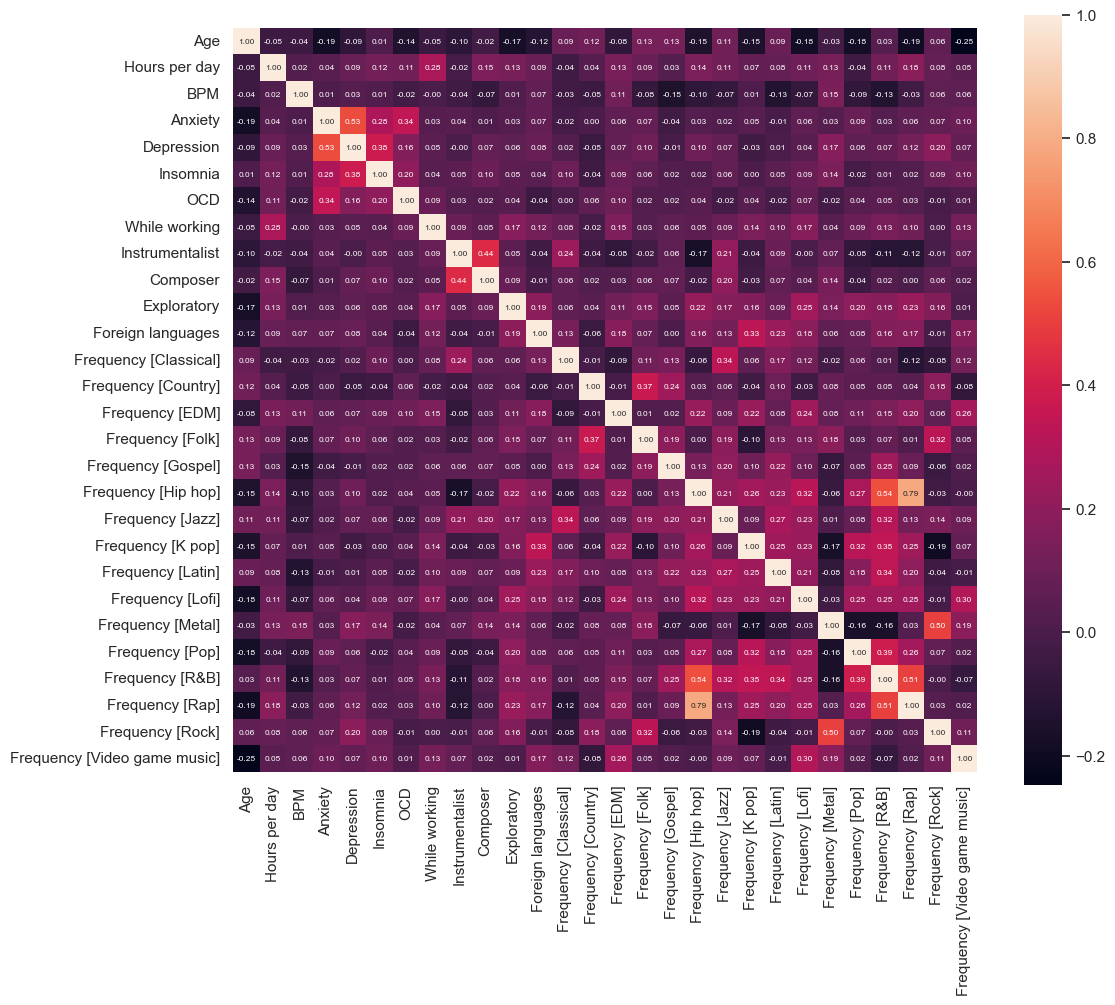

In [46]:
# Correlation Matrix
cols = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']
cm = np.corrcoef(listeningData_encoded[cols].values.T)
sns.set_theme(font_scale=1)
plt.figure(figsize=(12, 10))
hm = sns.heatmap(cm,cbar=True,annot=True,
                 square=True,fmt='.2f',
                 annot_kws={'size': 6},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [43]:
# saving the encoded dataframe to csv
listeningData_encoded.to_csv("Data/listeningData_encoded.csv", index=False)